In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Load datasets
customers = pd.read_csv('D:/Zeotap Assignment/Customers.csv')
products = pd.read_csv('D:/Zeotap Assignment/Products.csv')
transactions = pd.read_csv('D:/Zeotap Assignment/Transactions.csv')

In [3]:
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"], errors="coerce")
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"], format="%d-%m-%Y %H:%M", errors="coerce")

In [4]:
# Aggregate transaction data
txn_summary = transactions.groupby("CustomerID").agg(
    TotalSpent=("TotalValue", "sum"),
    AvgSpent=("TotalValue", "mean"),
    TransactionCount=("TransactionID", "count"),
    AvgQuantity=("Quantity", "mean"),
).reset_index()

In [5]:
# Merge customer data with transaction data
data = customers.merge(txn_summary, on="CustomerID", how="left").fillna(0)

In [6]:
# Encode categorical variable (Region)
data = pd.get_dummies(data, columns=["Region"], drop_first=True)

In [7]:
# Scale the numerical features
features = ["TotalSpent", "AvgSpent", "TransactionCount", "AvgQuantity"]
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [16]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Silhouette Score
silhouette = silhouette_score(data[features], data["Cluster"])
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.3103760854520609


In [17]:
# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data[features], data["Cluster"])
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Inertia (Within-Cluster Sum of Squares)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Calinski-Harabasz Index: 98.87204839984135
Inertia: 318.3005703893269


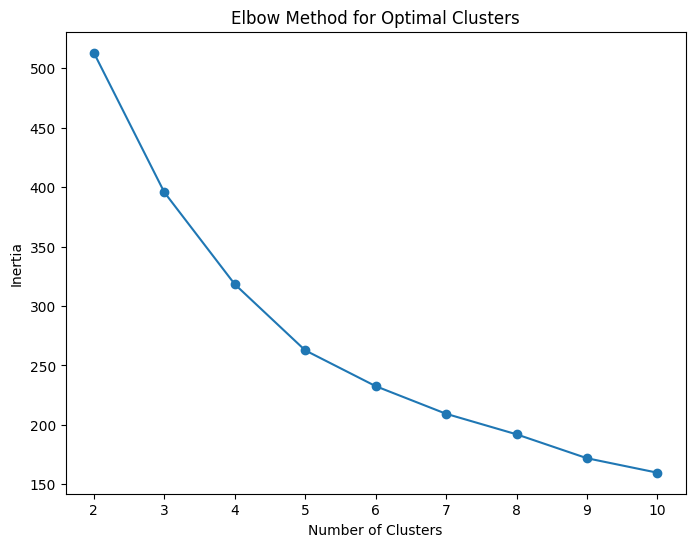

In [18]:
# 2. Visualizations

# Elbow Method: Plot inertia for different values of n_clusters to find the optimal number of clusters
inertia_values = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans.fit(data[features])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker="o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

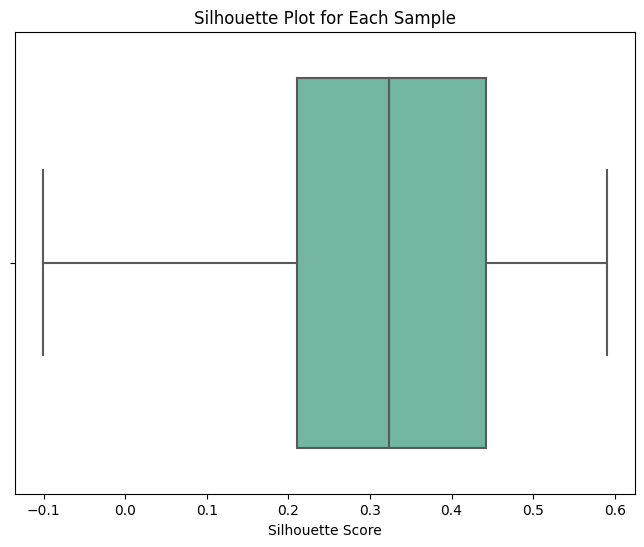

In [19]:
# Silhouette Plot: Visualizing the silhouette score for each sample
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(data[features], data["Cluster"])

plt.figure(figsize=(8, 6))
sns.boxplot(x=silhouette_vals, palette="Set2")
plt.title("Silhouette Plot for Each Sample")
plt.xlabel("Silhouette Score")
plt.show()

In [8]:
# Apply KMeans clustering
num_clusters = 4  # Change as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(data[features])

In [9]:
# Evaluate using Davies-Bouldin Index
db_index = davies_bouldin_score(data[features], data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.0492354927731946


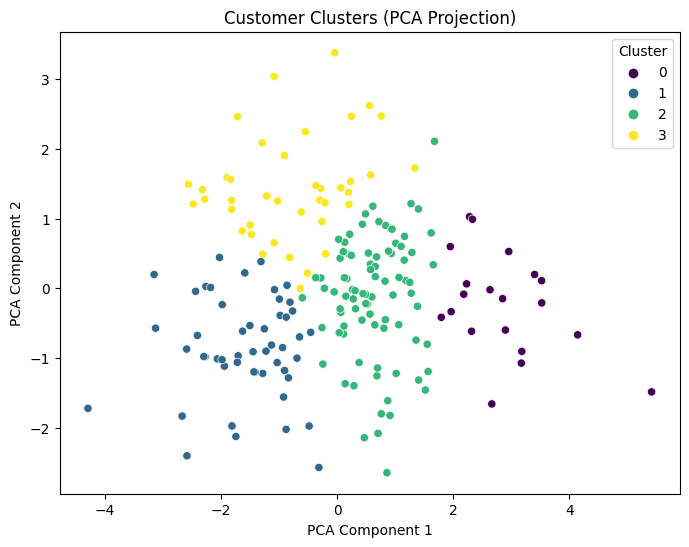

In [10]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[features])
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data["Cluster"], palette="viridis")
plt.title("Customer Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()